<a href="https://colab.research.google.com/github/kishan-pithadiya/Sales-Analysis/blob/main/Sales_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
#Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

**Mount a Google drive to collaboratory**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


**1. Merge the 12 months of sales data into a single CSV**

In [ ]:
# 1) Merge the 12 months of sales data into a single CSV
files = [file for file in os.listdir("/content/gdrive/MyDrive/Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
  df = pd.read_csv("/content/gdrive/MyDrive/Sales_Data/"+file)
  all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_months_data.csv",index = False)

**Read all months data dataframe**

In [ ]:
#Read all months data dataframe
all_data = pd.read_csv("/content/all_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Clean up the Data and Duplicates**

In [ ]:
# Clean up the Data and Duplicates
#Read all NAN values record
NAN_df = all_data[all_data.isnull().any(axis=1)]

#Remove all NAN values data and reset index
all_data = all_data.dropna(how="all")
all_data = all_data.reset_index(drop = True)

#Remove duplicate data
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

**Covert columns to the correct type**

In [ ]:
# Covert columns to the correct type
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
# all_data.dtypes

**Augment data with additional columns**

**i) Add a month column**

In [ ]:
#Month column for according date
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int64")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


**ii) Add a sales column**

In [ ]:
#Sales column for each order ID total purchase
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


**iii) Add a city column**

In [ ]:
# Add a city column
def get_city(address):
  return address.split(",")[1]
def get_state(address):
  return address.split(",")[2].split(" ")[1]
all_data["City"] = all_data["Purchase Address"].apply(lambda k : f"{get_city(k)} ({get_state(k)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


**Q.-1 What was the best month for sales? How much was earned that month?**

In [ ]:
#Sum of sales group by Month
Sales_according_month = all_data.groupby("Month").sum()
Sales_according_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


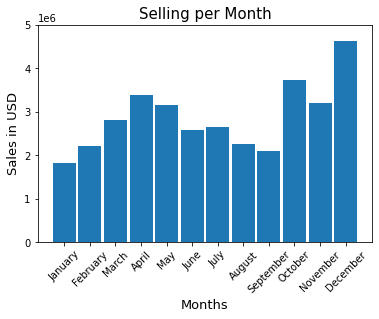

In [ ]:
#Plot Each month sales
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.bar(months,Sales_according_month["Sales"],width = 0.9)
plt.title("Selling per Month",fontsize = 15)
plt.xlabel("Months",fontsize = 13)
plt.ylabel("Sales in USD",fontsize = 13)
plt.xticks(months,rotation = 45)
plt.yticks([i*1000000 for i in range(6)])
plt.show()

**Q.-2 What city had the highst number of sales?**

In [ ]:
#Sum of sales group by City
highst_sales = all_data.groupby("City").sum()
highst_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


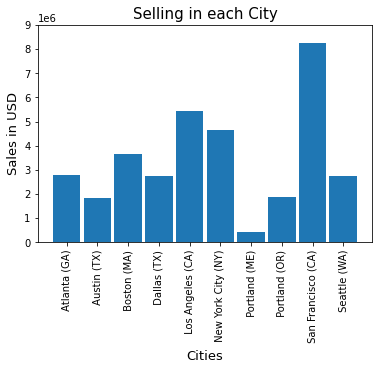

In [ ]:
#Plot each city sales
cities = [city for city, df in all_data.groupby("City")]
# cities = all_data["City"].unique()
plt.bar(cities,highst_sales["Sales"],width = 0.9)
plt.title("Selling in each City",fontsize = 15)
plt.xlabel("Cities",fontsize = 13)
plt.ylabel("Sales in USD",fontsize = 13)
plt.xticks(cities,rotation = "vertical")
plt.yticks([i*1000000 for i in range(10)])
plt.show()

**Q.-3 What time should we display advertisements to maximize likehood of customer's buying product?**

In [ ]:
#Add Hour and Minute column
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute


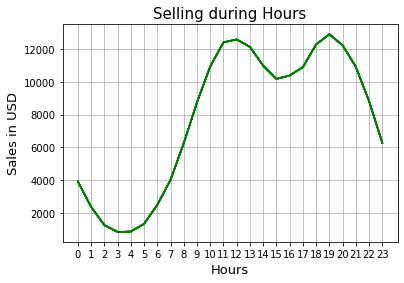

In [ ]:
#Plot the graph
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby("Hour").count(),c = "g")
plt.title("Selling during Hours",fontsize = 15)
plt.xlabel("Hours",fontsize = 13)
plt.ylabel("Sales in USD",fontsize = 13)
plt.grid()
plt.xticks(hours)
plt.show()
#So according to graph we can see 12pm (12) or 7pm (19) are the best time for display in advertisements

**Q.-4 Which products are most often sold together?**

In [ ]:
#Check for duplicate Order ID
df = all_data[all_data["Order ID"].duplicated(keep = False)]
df["Together_Product"] = df.groupby("Order ID")["Product"].transform(lambda k: ",".join(k))
df = df[["Order ID","Together_Product"]].drop_duplicates()
# df.Together_Product.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Together_Product"]:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list,2)))

count.most_common(10)
#By this we can consider that iphone and lightining charging cable are products that most often sold together

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

**Q.-5 Which product sold the most? Why do you think it sold the most?**

In [ ]:
products = all_data.groupby("Product")
quantity_product = products.sum()["Quantity Ordered"]

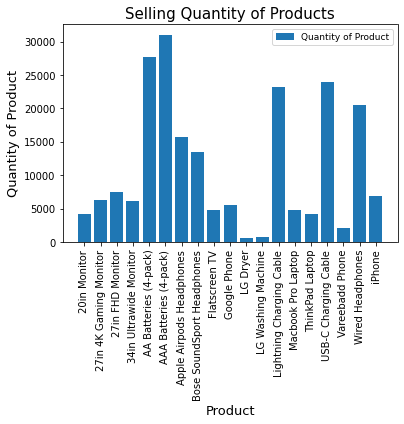

In [ ]:
#Plot the graph
prod = [product for product, df in products]
plt.bar(prod,quantity_product)
plt.title("Selling Quantity of Products",fontsize = 15)
plt.xlabel("Product",fontsize = 13)
plt.ylabel("Quantity of Product",fontsize = 13)
plt.xticks(prod,rotation = "vertical")
plt.legend(["Quantity of Product"],loc = "upper right",prop={'size': 9})
plt.show()


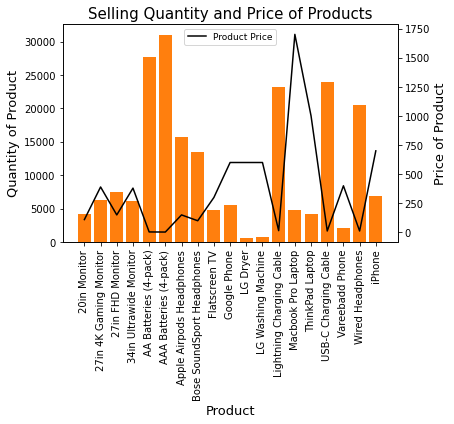

In [ ]:
#Overlaying y-axis plot price of products
prices = all_data.groupby("Product").mean()["Price Each"]
prices
fig, graph_1 = plt.subplots()
graph_2 = graph_1.twinx()
graph_1.bar(prod,quantity_product,color = 'tab:orange')
graph_2.plot(prod,prices,c = "k")
plt.title("Selling Quantity and Price of Products",fontsize = 15)
graph_1.set_xlabel("Product",fontsize = 13)
graph_1.set_ylabel("Quantity of Product",fontsize = 13)
graph_2.set_ylabel("Price of Product",fontsize = 13)
graph_1.set_xticklabels(prod,rotation = "vertical")
plt.legend(["Product Price"],loc = "upper center",prop={'size': 9})
plt.show()